# Falsification with VerifAI

Please ensure that the CARLA simulator is up and running on port 2000 before running the falsifier below. For more information, visit the [CARLA website](https://carla.org/). Also, be sure to install all the required dependencies by running `install.sh` from this directory.

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
from dotmap import DotMap

from verifai.samplers.scenic_sampler import ScenicSampler
from verifai.scenic_server import ScenicServer
from verifai.falsifier import generic_falsifier
from verifai.monitor import specification_monitor
from verifai.falsifier import generic_falsifier
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/home/scenic/Desktop/Carla/VerifiedAI/Scenic/src/scenic/core/errors.py:160: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn('unable to install sys.excepthook to format Scenic backtraces')


In [2]:
# The specification must assume multi_objective_monitor class
class confidence_spec(specification_monitor):
    def __init__(self):
        def specification(traj):
            return 1
        
        super().__init__(specification)

In [3]:
def test_driving_dynamic():

    path = 'carlaChallenge1.scenic'
    sampler = ScenicSampler.fromScenario(path)
    falsifier_params = DotMap(
        n_iters=5,
        save_error_table=True,
        save_safe_table=True,
    )
    server_options = DotMap(maxSteps=200, verbosity=0)
    monitor = confidence_spec()
    
    falsifier = generic_falsifier(sampler=sampler,
                                  falsifier_params=falsifier_params,
                                  server_class=ScenicServer,
                                  server_options=server_options,
                                  monitor=monitor)
    t0 = time.time()
    falsifier.run_falsifier()
    t = time.time() - t0
    print(f'Generated {len(falsifier.samples)} samples in {t} seconds with 1 worker')
    print(f'Number of counterexamples: {len(falsifier.error_table.table)}')
    return falsifier

In [4]:
falsifier = test_driving_dynamic()

Initializing server
Sample no:  0 
Sample:  SpacePoint(objects=StructPoint(object0=StructPoint(angularSpeed=0.0, blueprint='vehicle.lincoln.mkz2017', carlaActor=None, color=Color(r=0.3773959306006354, g=0.4155612784062785, b=0.38199394003583564), elevation=None, heading=0.00021102855808918797, lastActions=None, length=4.5, physics=True, position=(396.30251261784133, -158.52232260700606), roadDeviation=0.0, rolename=None, speed=0.0, type='Car', velocity=(0.0, 0.0), width=2.0), object1=StructPoint(angularSpeed=0.0, blueprint='static.prop.dirtdebris01', carlaActor=None, color=None, elevation=None, heading=0.00021102855808918797, lastActions=None, length=0.5, physics=False, position=(396.29962375208356, -144.83286871929243), rolename=None, speed=0.0, type='Debris', velocity=(0.0, 0.0), width=0.5), object2=StructPoint(angularSpeed=0.0, blueprint='static.prop.dirtdebris03', carlaActor=None, color=None, elevation=None, heading=0.00021102855808918797, lastActions=None, length=0.5, physics=Fals

In [9]:
df = pd.concat([falsifier.safe_table.table, falsifier.error_table.table])

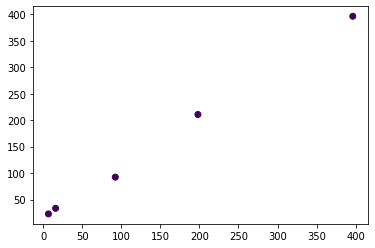

In [10]:
plt.scatter(df['point.objects.object0.position[0]'], df['point.objects.object1.position[0]'], c=df['rho'] < 0);